In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))   
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 12 Jul 2018

Distributed under the terms of the MIT License.

# Notebook for specific visualization of molecules using RDKIT and other functions

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import os
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors3D import NPR1, NPR2, PMI1, PMI2, PMI3
from rdkit.Chem.Draw.MolDrawing import MolDrawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Geometry import rdGeometry
from rdkit.Chem import PyMol
import py3Dmol
from ipywidgets import interact, interactive, fixed
from rdkit import Geometry
import tempfile
import matplotlib.pyplot as plt
%aimport rdkit_functions
%aimport ellipsoid

In [3]:
# molecule file dir
molecule_file = '/home/atarzia/psp/linBmolecules/linbmolecules.txt'
# output dir
output_dir = '/home/atarzia/psp/linBmolecules/'

In [4]:
df, molecules, diameters = rdkit_functions.read_mol_txt_file(molecule_file)
rdkit_functions.produce_quick_fig_mol(molecules, output_dir+'molecules.pdf')

/home/atarzia/psp/linBmolecules/molecules_1.pdf
/home/atarzia/psp/linBmolecules/molecules_2.pdf


## visualize molecules for Figure

In [8]:
molecules = {'ethanol': 'CCO',
             'cyclohexane': 'C1CCCCC1'}

In [9]:
for name, smile in molecules.items():
    m = Chem.MolFromSmiles(smile)
    Draw.MolToFile(m, '/home/atarzia/psp/documents/psp_paper/figures/'+name+'.png')
    rdkit_functions.calc_molecule_diameter(name, smile, out_dir='./',
                                           vdwScale=0.8, 
                                           boxMargin=6.0, spacing=0.3,
                                           MW_thresh=130, show_vdw=True, 
                                           plot_ellip=False,
                                           N_conformers=1)
    input('done?')

done?
run 'pymol -R' to visualise structures
visualisation will be skipped


UnboundLocalError: local variable 'v' referenced before assignment

##  visualize all conformers of a molecule

In [5]:
def drawit(m, p, confId=-1):
    mb = Chem.MolToMolBlock(m, confId=confId)
    p.removeAllModels()
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()


def drawit2(m, p, confId=-1):
    mb = Chem.MolToMolBlock(m, confId=confId)
    p.addModel(mb, 'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()

In [6]:
molecules = {'n-hexane': 'O=C([O-])C(=O)[O-]'}

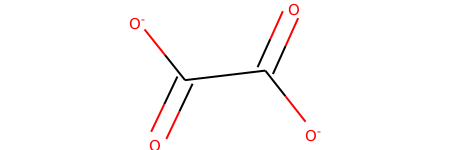

In [8]:
m

In [7]:
for name, smile in molecules.items():
    # if name != 'MIM':
    #     continue
    m = Chem.MolFromSmiles(smile)
    m = Chem.AddHs(m)
    Chem.EmbedMultipleConfs(m, numConfs=10, randomSeed=0xf00d, 
                            useExpTorsionAnglePrefs=True,
                            useBasicKnowledge=True)
    p = py3Dmol.view(width=400,height=400)
    interact(drawit, m=fixed(m),p=fixed(p),confId=(0,m.GetNumConformers()-1))

You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
for name, smile in molecules.items():
    # if name != '1,9-dichlorononane':
    #     continue
    m = Chem.MolFromSmiles(smile)
    m = Chem.AddHs(m)
    Chem.EmbedMultipleConfs(m, numConfs=10, randomSeed=0xf00d, 
                            useExpTorsionAnglePrefs=True,
                            useBasicKnowledge=True)
    p = py3Dmol.view(width=400,height=400)
    for confId in range(10):
        drawit2(m,p,confId)
    p.show()

RDKit ERROR: [15:31:57] UFFTYPER: Unrecognized hybridization for atom: 2
RDKit ERROR: [15:31:57] UFFTYPER: Unrecognized atom type: Fe (2)


ValueError: Bad Conformer Id

## visualise the ellipsoid around a desired molecule

In [9]:
name = 'Urea'
smiles = 'C(=O)(N)N'
molecules = {name: smiles}
diameters = {name: 0}
output_dir = '/home/atarzia/psp/documents/images/'

In [10]:
m = Chem.MolFromSmiles(smiles)
m = Chem.AddHs(m)
Chem.EmbedMultipleConfs(m, numConfs=10, randomSeed=0xf00d, 
                        useExpTorsionAnglePrefs=True,
                        useBasicKnowledge=True)
p = py3Dmol.view(width=400,height=400)
for confId in range(10):
    drawit2(m,p,confId)
p.show()

You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

molecule: Urea : SMILES: C(=O)(N)N


<IPython.core.display.Javascript object>


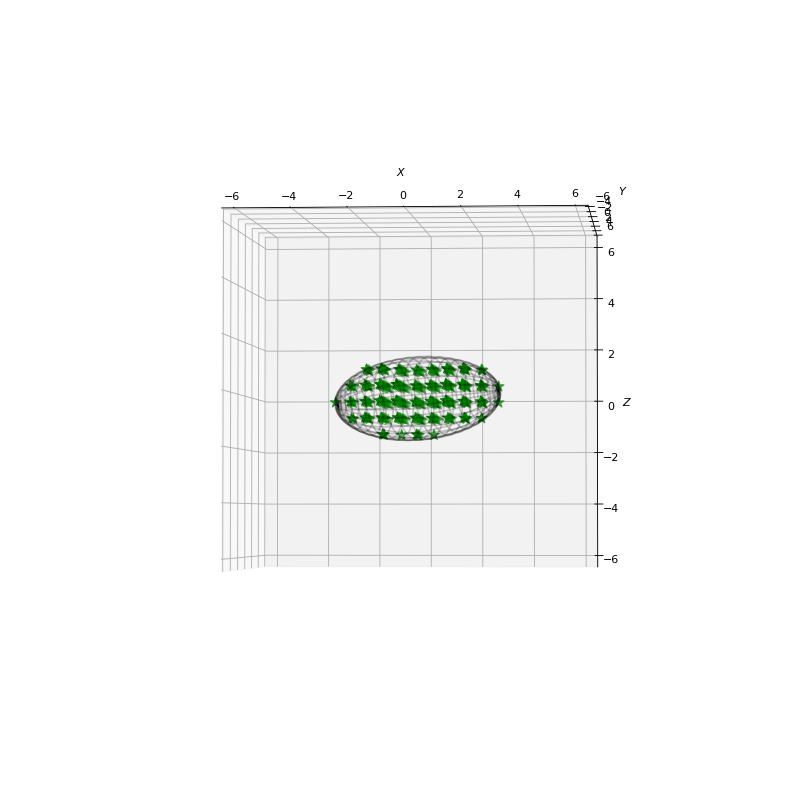

save fig?
1 out of 1 done


,confId,diam1,diam2,diam3,ratio_1,ratio_2
0,0,3.080662,5.49859,6.185282,0.451836,0.548164


In [11]:
rdkit_functions.calc_molecule_diameters(molecules, diameters, 
                                        out_dir=output_dir, vdwScale=0.8, boxMargin=4.0,
                                        spacing=0.6, show_vdw=False, plot_ellip=True,
                                        N_conformers=1, 
                                        show_conf=False)

## Visualize properties of a random subset of reaction systems in a directory for comparison
- check:
    - reaction components with Database website
    - molecules with PUBCHEM/CHEBI
    - molecule properties with PUBCHEM
    - sequence with Database website
    - sequence properties with UniPROT

In [12]:
import molecule as mol
from molecule import molecule
import rxn_syst
from rxn_syst import reaction
import numpy as np
import random
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from IPython.display import clear_output

In [56]:
rs_dir = '/home/atarzia/psp/screening_results/biomin_search/'

In [116]:
rs_list = [i for i in rxn_syst.yield_rxn_syst(output_dir=rs_dir)]
print(len(rs_list))

427


In [118]:
smiles_list = []
n_list = []
for ch in np.arange(1):
    rs = random.choice(rs_list)
    print('pkl', rs.pkl)
    print('EC', rs.EC)
    try:
        print('reversible?', rs.reversible)
    except AttributeError:
        print('reversible?', 'unknown')
    if rs.skip_rxn is True:
        print('should be skipped?')
    else:
        print('----------------------------------------------')
        # check component properties
        smiles_list = []
        n_list = []
        for m in rs.components:
            print('-----------')
            print(m.name, '--', m.role)
            print('iupac:', m.iupac_name)
            if m.SMILES is not None:
                n_list.append(m.DB+' - '+m.name)
                smiles_list.append(m.SMILES)
                print('SMILES:', m.SMILES)
                print('PUBCHEM XlogP:', m.XlogP)
                print('PUBCHEM complexity:', m.complexity)
       
        # check sequence properties
        print('----------------------------------------------')
        if rs.sequence is not None:
            try:
                print('uniprotID:', rs.UniprotID)
            except AttributeError:
                pass
            print('add other sequence IDs for other DBs')
            print('sequence length:', len(rs.sequence))
            print('pI:', rs.pI)
            print('GRAVY:', rs.GRAVY)
            print('A index:', rs.A_index)
            print('I index:', rs.I_index)
        
    #input('done?')
    #clear_output()
# draw the molecules
if len(m_list) > 0:
    m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
    Draw.MolsToGridImage(m_list, legends=n_list)    

pkl sRS-1_1_3_4-SABIO-6104.pkl
EC 1.1.3.4
reversible? unknown
----------------------------------------------
-----------
D-Glucono-1,5-lactone -- product
iupac: (3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-one
SMILES: O=C1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
PUBCHEM XlogP: -2.0
PUBCHEM complexity: 181.0
-----------
beta-D-Glucose -- reactant
iupac: (2R,3R,4S,5S,6R)-6-(hydroxymethyl)oxane-2,3,4,5-tetrol
SMILES: OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O
PUBCHEM XlogP: -2.6
PUBCHEM complexity: 151.0
-----------
H2O2 -- product
iupac: hydrogen peroxide
SMILES: OO
PUBCHEM XlogP: -0.9
PUBCHEM complexity: 0.0
-----------
O2 -- reactant
iupac: Molecular oxygen
SMILES: [O]
PUBCHEM XlogP: -1.1
PUBCHEM complexity: 0.0
----------------------------------------------


AttributeError: 'reaction' object has no attribute 'sequence'

In [70]:
m.SMILES

## Visualize a random subset of molecules in molecule database

In [34]:
import molecule as mol
from molecule import molecule
import numpy as np
import random
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [35]:
mol_db_dir = '/home/atarzia/psp/molecule_DBs/atarzia/'

In [36]:
mol_list = [i for i in mol.yield_molecules(directory=mol_db_dir)]

----
doing 1 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7099.pkl
----
doing 2 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4366.pkl
----
doing 3 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11801.pkl
----
doing 4 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1350.pkl
----
doing 5 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3249.pkl
----
doing 6 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9746.pkl
----
doing 7 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12393.pkl
----
doing 8 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2772.pkl
----
doing 9 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_455.pkl
----
doing 10 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8197.pkl
----
doing 11 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_780.pkl
----
doing 12 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11621.pkl
----
doing 13 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9840.pkl
----
doing 14 of 135

----
doing 463 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11455.pkl
----
doing 464 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7617.pkl
----
doing 465 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11376.pkl
----
doing 466 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10850.pkl
----
doing 467 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13352.pkl
----
doing 468 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6334.pkl
----
doing 469 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6289.pkl
----
doing 470 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5616.pkl
----
doing 471 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11572.pkl
----
doing 472 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1168.pkl
----
doing 473 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2849.pkl
----
doing 474 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11943.pkl
----
doing 475 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_79

doing 754 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7646.pkl
----
doing 755 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7679.pkl
----
doing 756 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6056.pkl
----
doing 757 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2118.pkl
----
doing 758 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11836.pkl
----
doing 759 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4023.pkl
----
doing 760 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2075.pkl
----
doing 761 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5909.pkl
----
doing 762 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10827.pkl
----
doing 763 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3881.pkl
----
doing 764 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12935.pkl
----
doing 765 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6142.pkl
----
doing 766 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12323.pkl


/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5010.pkl
----
doing 1088 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12497.pkl
----
doing 1089 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1820.pkl
----
doing 1090 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8620.pkl
----
doing 1091 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4059.pkl
----
doing 1092 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8867.pkl
----
doing 1093 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5018.pkl
----
doing 1094 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1777.pkl
----
doing 1095 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3715.pkl
----
doing 1096 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9512.pkl
----
doing 1097 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1794.pkl
----
doing 1098 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8461.pkl
----
doing 1099 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9897.pkl
----
doing

doing 1421 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4895.pkl
----
doing 1422 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6854.pkl
----
doing 1423 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6217.pkl
----
doing 1424 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_153.pkl
----
doing 1425 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3306.pkl
----
doing 1426 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11380.pkl
----
doing 1427 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8040.pkl
----
doing 1428 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6633.pkl
----
doing 1429 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8573.pkl
----
doing 1430 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13174.pkl
----
doing 1431 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1365.pkl
----
doing 1432 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12244.pkl
----
doing 1433 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATR

doing 1741 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_482.pkl
----
doing 1742 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11944.pkl
----
doing 1743 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2637.pkl
----
doing 1744 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12030.pkl
----
doing 1745 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11081.pkl
----
doing 1746 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12749.pkl
----
doing 1747 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4251.pkl
----
doing 1748 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6924.pkl
----
doing 1749 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2132.pkl
----
doing 1750 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4013.pkl
----
doing 1751 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12045.pkl
----
doing 1752 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2940.pkl
----
doing 1753 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/A

----
doing 2072 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5157.pkl
----
doing 2073 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1550.pkl
----
doing 2074 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11954.pkl
----
doing 2075 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3453.pkl
----
doing 2076 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9155.pkl
----
doing 2077 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7150.pkl
----
doing 2078 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13074.pkl
----
doing 2079 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7115.pkl
----
doing 2080 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8256.pkl
----
doing 2081 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4081.pkl
----
doing 2082 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3534.pkl
----
doing 2083 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11608.pkl
----
doing 2084 of 13548
/home/atarzia/psp/molecule_DBs/atarz

----
doing 2497 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4417.pkl
----
doing 2498 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9654.pkl
----
doing 2499 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8968.pkl
----
doing 2500 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11832.pkl
----
doing 2501 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7598.pkl
----
doing 2502 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6391.pkl
----
doing 2503 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2087.pkl
----
doing 2504 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3257.pkl
----
doing 2505 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2874.pkl
----
doing 2506 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9907.pkl
----
doing 2507 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_642.pkl
----
doing 2508 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3469.pkl
----
doing 2509 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/

----
doing 2686 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6958.pkl
----
doing 2687 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_817.pkl
----
doing 2688 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3651.pkl
----
doing 2689 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9404.pkl
----
doing 2690 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8854.pkl
----
doing 2691 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2165.pkl
----
doing 2692 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5364.pkl
----
doing 2693 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5074.pkl
----
doing 2694 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5602.pkl
----
doing 2695 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6528.pkl
----
doing 2696 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11053.pkl
----
doing 2697 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_263.pkl
----
doing 2698 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/A

doing 3087 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7740.pkl
----
doing 3088 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4522.pkl
----
doing 3089 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8999.pkl
----
doing 3090 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_218.pkl
----
doing 3091 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4673.pkl
----
doing 3092 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1305.pkl
----
doing 3093 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_39.pkl
----
doing 3094 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_14.pkl
----
doing 3095 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9616.pkl
----
doing 3096 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4974.pkl
----
doing 3097 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4914.pkl
----
doing 3098 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5682.pkl
----
doing 3099 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13449

----
doing 3504 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8204.pkl
----
doing 3505 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2411.pkl
----
doing 3506 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_273.pkl
----
doing 3507 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_746.pkl
----
doing 3508 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1773.pkl
----
doing 3509 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4188.pkl
----
doing 3510 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4966.pkl
----
doing 3511 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9171.pkl
----
doing 3512 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4316.pkl
----
doing 3513 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11645.pkl
----
doing 3514 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12571.pkl
----
doing 3515 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2976.pkl
----
doing 3516 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/

----
doing 3832 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6243.pkl
----
doing 3833 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_806.pkl
----
doing 3834 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7918.pkl
----
doing 3835 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12496.pkl
----
doing 3836 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6529.pkl
----
doing 3837 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4476.pkl
----
doing 3838 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2858.pkl
----
doing 3839 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9634.pkl
----
doing 3840 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5077.pkl
----
doing 3841 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5527.pkl
----
doing 3842 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9233.pkl
----
doing 3843 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10722.pkl
----
doing 3844 of 13548
/home/atarzia/psp/molecule_DBs/atarzia

doing 4087 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4495.pkl
----
doing 4088 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11808.pkl
----
doing 4089 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12736.pkl
----
doing 4090 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4489.pkl
----
doing 4091 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5033.pkl
----
doing 4092 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6968.pkl
----
doing 4093 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5043.pkl
----
doing 4094 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1010.pkl
----
doing 4095 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6109.pkl
----
doing 4096 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_755.pkl
----
doing 4097 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4292.pkl
----
doing 4098 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12945.pkl
----
doing 4099 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATR

doing 4503 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12595.pkl
----
doing 4504 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11524.pkl
----
doing 4505 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2449.pkl
----
doing 4506 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_411.pkl
----
doing 4507 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4109.pkl
----
doing 4508 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6196.pkl
----
doing 4509 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8954.pkl
----
doing 4510 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6579.pkl
----
doing 4511 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3128.pkl
----
doing 4512 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11633.pkl
----
doing 4513 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8138.pkl
----
doing 4514 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8876.pkl
----
doing 4515 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATR

----
doing 4795 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7524.pkl
----
doing 4796 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7766.pkl
----
doing 4797 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11937.pkl
----
doing 4798 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5302.pkl
----
doing 4799 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6215.pkl
----
doing 4800 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10996.pkl
----
doing 4801 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4273.pkl
----
doing 4802 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_41.pkl
----
doing 4803 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5248.pkl
----
doing 4804 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2261.pkl
----
doing 4805 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4336.pkl
----
doing 4806 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7188.pkl
----
doing 4807 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/

doing 5131 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3220.pkl
----
doing 5132 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13278.pkl
----
doing 5133 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10467.pkl
----
doing 5134 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2451.pkl
----
doing 5135 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5496.pkl
----
doing 5136 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12096.pkl
----
doing 5137 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_130.pkl
----
doing 5138 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3536.pkl
----
doing 5139 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12627.pkl
----
doing 5140 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4096.pkl
----
doing 5141 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8321.pkl
----
doing 5142 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13183.pkl
----
doing 5143 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/A

----
doing 5421 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10363.pkl
----
doing 5422 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3688.pkl
----
doing 5423 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2022.pkl
----
doing 5424 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10469.pkl
----
doing 5425 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1090.pkl
----
doing 5426 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1491.pkl
----
doing 5427 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4812.pkl
----
doing 5428 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4333.pkl
----
doing 5429 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4545.pkl
----
doing 5430 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11352.pkl
----
doing 5431 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10037.pkl
----
doing 5432 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6549.pkl
----
doing 5433 of 13548
/home/atarzia/psp/molecule_DBs/atar

doing 5836 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10795.pkl
----
doing 5837 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_144.pkl
----
doing 5838 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2515.pkl
----
doing 5839 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9999.pkl
----
doing 5840 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12421.pkl
----
doing 5841 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5191.pkl
----
doing 5842 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3824.pkl
----
doing 5843 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2024.pkl
----
doing 5844 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_157.pkl
----
doing 5845 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5099.pkl
----
doing 5846 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6010.pkl
----
doing 5847 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4425.pkl
----
doing 5848 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_

----
doing 6269 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12552.pkl
----
doing 6270 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3040.pkl
----
doing 6271 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11957.pkl
----
doing 6272 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13290.pkl
----
doing 6273 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4019.pkl
----
doing 6274 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1426.pkl
----
doing 6275 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5300.pkl
----
doing 6276 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3278.pkl
----
doing 6277 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10067.pkl
----
doing 6278 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3767.pkl
----
doing 6279 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13356.pkl
----
doing 6280 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_479.pkl
----
doing 6281 of 13548
/home/atarzia/psp/molecule_DBs/atar

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9485.pkl
----
doing 6568 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8342.pkl
----
doing 6569 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13343.pkl
----
doing 6570 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9983.pkl
----
doing 6571 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2444.pkl
----
doing 6572 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5133.pkl
----
doing 6573 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10666.pkl
----
doing 6574 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1816.pkl
----
doing 6575 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11931.pkl
----
doing 6576 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9645.pkl
----
doing 6577 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6080.pkl
----
doing 6578 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5208.pkl
----
doing 6579 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5383.pkl
----
doi

----
doing 7078 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3028.pkl
----
doing 7079 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9807.pkl
----
doing 7080 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6446.pkl
----
doing 7081 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11294.pkl
----
doing 7082 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9847.pkl
----
doing 7083 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3858.pkl
----
doing 7084 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9165.pkl
----
doing 7085 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8529.pkl
----
doing 7086 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_691.pkl
----
doing 7087 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10689.pkl
----
doing 7088 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3769.pkl
----
doing 7089 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_827.pkl
----
doing 7090 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/

----
doing 7448 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1980.pkl
----
doing 7449 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_260.pkl
----
doing 7450 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5069.pkl
----
doing 7451 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_920.pkl
----
doing 7452 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13122.pkl
----
doing 7453 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11400.pkl
----
doing 7454 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9969.pkl
----
doing 7455 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4426.pkl
----
doing 7456 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5651.pkl
----
doing 7457 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4148.pkl
----
doing 7458 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2852.pkl
----
doing 7459 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11549.pkl
----
doing 7460 of 13548
/home/atarzia/psp/molecule_DBs/atarzia

----
doing 7748 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9648.pkl
----
doing 7749 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3145.pkl
----
doing 7750 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1237.pkl
----
doing 7751 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2083.pkl
----
doing 7752 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10967.pkl
----
doing 7753 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9457.pkl
----
doing 7754 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7471.pkl
----
doing 7755 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6063.pkl
----
doing 7756 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12929.pkl
----
doing 7757 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8183.pkl
----
doing 7758 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_790.pkl
----
doing 7759 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6326.pkl
----
doing 7760 of 13548
/home/atarzia/psp/molecule_DBs/atarzia

doing 8086 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1598.pkl
----
doing 8087 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5472.pkl
----
doing 8088 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5760.pkl
----
doing 8089 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8367.pkl
----
doing 8090 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9243.pkl
----
doing 8091 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1327.pkl
----
doing 8092 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10262.pkl
----
doing 8093 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10691.pkl
----
doing 8094 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5027.pkl
----
doing 8095 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12946.pkl
----
doing 8096 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7821.pkl
----
doing 8097 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4690.pkl
----
doing 8098 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/AT

----
doing 8487 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6112.pkl
----
doing 8488 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1924.pkl
----
doing 8489 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1905.pkl
----
doing 8490 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10553.pkl
----
doing 8491 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_646.pkl
----
doing 8492 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5160.pkl
----
doing 8493 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3889.pkl
----
doing 8494 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8916.pkl
----
doing 8495 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5963.pkl
----
doing 8496 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3010.pkl
----
doing 8497 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7200.pkl
----
doing 8498 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1790.pkl
----
doing 8499 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/

----
doing 8777 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12921.pkl
----
doing 8778 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12481.pkl
----
doing 8779 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_108.pkl
----
doing 8780 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3779.pkl
----
doing 8781 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3557.pkl
----
doing 8782 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1607.pkl
----
doing 8783 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8462.pkl
----
doing 8784 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12654.pkl
----
doing 8785 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9887.pkl
----
doing 8786 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5431.pkl
----
doing 8787 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1294.pkl
----
doing 8788 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8965.pkl
----
doing 8789 of 13548
/home/atarzia/psp/molecule_DBs/atarzi

----
doing 9184 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10480.pkl
----
doing 9185 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3321.pkl
----
doing 9186 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2664.pkl
----
doing 9187 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1603.pkl
----
doing 9188 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_30.pkl
----
doing 9189 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6272.pkl
----
doing 9190 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6375.pkl
----
doing 9191 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13219.pkl
----
doing 9192 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12335.pkl
----
doing 9193 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13347.pkl
----
doing 9194 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12163.pkl
----
doing 9195 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6565.pkl
----
doing 9196 of 13548
/home/atarzia/psp/molecule_DBs/atarz

----
doing 9567 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2693.pkl
----
doing 9568 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11732.pkl
----
doing 9569 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1149.pkl
----
doing 9570 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4520.pkl
----
doing 9571 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10739.pkl
----
doing 9572 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5503.pkl
----
doing 9573 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7781.pkl
----
doing 9574 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7500.pkl
----
doing 9575 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4459.pkl
----
doing 9576 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7285.pkl
----
doing 9577 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7564.pkl
----
doing 9578 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5721.pkl
----
doing 9579 of 13548
/home/atarzia/psp/molecule_DBs/atarzi

----
doing 9836 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7417.pkl
----
doing 9837 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_800.pkl
----
doing 9838 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10458.pkl
----
doing 9839 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_247.pkl
----
doing 9840 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10396.pkl
----
doing 9841 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4201.pkl
----
doing 9842 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9630.pkl
----
doing 9843 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4774.pkl
----
doing 9844 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2845.pkl
----
doing 9845 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3380.pkl
----
doing 9846 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1585.pkl
----
doing 9847 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12251.pkl
----
doing 9848 of 13548
/home/atarzia/psp/molecule_DBs/atarzia

----
doing 10169 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11362.pkl
----
doing 10170 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8962.pkl
----
doing 10171 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10319.pkl
----
doing 10172 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4393.pkl
----
doing 10173 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11525.pkl
----
doing 10174 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7041.pkl
----
doing 10175 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4162.pkl
----
doing 10176 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9642.pkl
----
doing 10177 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9662.pkl
----
doing 10178 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3755.pkl
----
doing 10179 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6590.pkl
----
doing 10180 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6966.pkl
----
doing 10181 of 13548
/home/atarzia/psp/molec

----
doing 10559 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10296.pkl
----
doing 10560 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5491.pkl
----
doing 10561 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8907.pkl
----
doing 10562 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1659.pkl
----
doing 10563 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8852.pkl
----
doing 10564 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5434.pkl
----
doing 10565 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9560.pkl
----
doing 10566 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1484.pkl
----
doing 10567 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8069.pkl
----
doing 10568 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4629.pkl
----
doing 10569 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11422.pkl
----
doing 10570 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4729.pkl
----
doing 10571 of 13548
/home/atarzia/psp/molecu

----
doing 10890 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9394.pkl
----
doing 10891 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12043.pkl
----
doing 10892 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5509.pkl
----
doing 10893 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6771.pkl
----
doing 10894 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5030.pkl
----
doing 10895 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3587.pkl
----
doing 10896 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7960.pkl
----
doing 10897 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_159.pkl
----
doing 10898 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7501.pkl
----
doing 10899 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9365.pkl
----
doing 10900 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10534.pkl
----
doing 10901 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5097.pkl
----
doing 10902 of 13548
/home/atarzia/psp/molecul

doing 11168 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11902.pkl
----
doing 11169 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8903.pkl
----
doing 11170 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3826.pkl
----
doing 11171 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12768.pkl
----
doing 11172 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10209.pkl
----
doing 11173 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_676.pkl
----
doing 11174 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7057.pkl
----
doing 11175 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11741.pkl
----
doing 11176 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6476.pkl
----
doing 11177 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6059.pkl
----
doing 11178 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3090.pkl
----
doing 11179 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13098.pkl
----
doing 11180 of 13548
/home/atarzia/psp/molecule_

----
doing 11502 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4557.pkl
----
doing 11503 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_182.pkl
----
doing 11504 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1470.pkl
----
doing 11505 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9704.pkl
----
doing 11506 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8071.pkl
----
doing 11507 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_268.pkl
----
doing 11508 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8655.pkl
----
doing 11509 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_903.pkl
----
doing 11510 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8122.pkl
----
doing 11511 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2962.pkl
----
doing 11512 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1917.pkl
----
doing 11513 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4171.pkl
----
doing 11514 of 13548
/home/atarzia/psp/molecule_DB

doing 11835 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1229.pkl
----
doing 11836 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1448.pkl
----
doing 11837 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13207.pkl
----
doing 11838 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6971.pkl
----
doing 11839 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2623.pkl
----
doing 11840 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11411.pkl
----
doing 11841 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10182.pkl
----
doing 11842 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12755.pkl
----
doing 11843 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1706.pkl
----
doing 11844 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5867.pkl
----
doing 11845 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4720.pkl
----
doing 11846 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1005.pkl
----
doing 11847 of 13548
/home/atarzia/psp/molecule_

doing 12168 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5158.pkl
----
doing 12169 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10174.pkl
----
doing 12170 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11350.pkl
----
doing 12171 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5116.pkl
----
doing 12172 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2325.pkl
----
doing 12173 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8318.pkl
----
doing 12174 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4790.pkl
----
doing 12175 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10768.pkl
----
doing 12176 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11529.pkl
----
doing 12177 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11484.pkl
----
doing 12178 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8755.pkl
----
doing 12179 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1956.pkl
----
doing 12180 of 13548
/home/atarzia/psp/molecule

doing 12520 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10634.pkl
----
doing 12521 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1296.pkl
----
doing 12522 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8319.pkl
----
doing 12523 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7810.pkl
----
doing 12524 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2196.pkl
----
doing 12525 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1081.pkl
----
doing 12526 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8201.pkl
----
doing 12527 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11458.pkl
----
doing 12528 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7007.pkl
----
doing 12529 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8806.pkl
----
doing 12530 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11689.pkl
----
doing 12531 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4736.pkl
----
doing 12532 of 13548
/home/atarzia/psp/molecule_D

----
doing 12835 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7432.pkl
----
doing 12836 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1972.pkl
----
doing 12837 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3212.pkl
----
doing 12838 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5253.pkl
----
doing 12839 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10163.pkl
----
doing 12840 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3984.pkl
----
doing 12841 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8919.pkl
----
doing 12842 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9164.pkl
----
doing 12843 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11335.pkl
----
doing 12844 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8271.pkl
----
doing 12845 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6061.pkl
----
doing 12846 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2818.pkl
----
doing 12847 of 13548
/home/atarzia/psp/molecu

doing 13168 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1242.pkl
----
doing 13169 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9060.pkl
----
doing 13170 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1323.pkl
----
doing 13171 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12192.pkl
----
doing 13172 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1211.pkl
----
doing 13173 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13031.pkl
----
doing 13174 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5351.pkl
----
doing 13175 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3567.pkl
----
doing 13176 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4920.pkl
----
doing 13177 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12894.pkl
----
doing 13178 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4986.pkl
----
doing 13179 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5053.pkl
----
doing 13180 of 13548
/home/atarzia/psp/molecule_D

----
doing 13415 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13236.pkl
----
doing 13416 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4384.pkl
----
doing 13417 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6422.pkl
----
doing 13418 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1055.pkl
----
doing 13419 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7341.pkl
----
doing 13420 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8774.pkl
----
doing 13421 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7854.pkl
----
doing 13422 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13169.pkl
----
doing 13423 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13453.pkl
----
doing 13424 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10308.pkl
----
doing 13425 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12234.pkl
----
doing 13426 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6451.pkl
----
doing 13427 of 13548
/home/atarzia/psp/mol

3-iodobenzaldehyde
BRENDA
['BRENDA']
no pubchemID
no CHEBIID
C1=CC(=CC(=C1)I)C=O
Phe-Ala
BRENDA
['BRENDA']
no pubchemID
73630
C[C@H](NC(=O)[C@@H](N)Cc1ccccc1)C(O)=O
Gly-Met-Met
SABIO
['SABIO']
no pubchemID

CSCCC(N=C(O)C(CCSC)N=C(O)CN)C(=O)O
Pancratistatin
KEGG
['KEGG']
no pubchemID
7906
O[C@@H]1[C@@H](O)[C@H](O)[C@H]2[C@@H](NC(=O)c3c(O)c4OCOc4cc23)[C@@H]1O
xanthurenate
KEGG
['KEGG']
no pubchemID
71201
Oc1cccc2c(O)cc(nc12)C([O-])=O
Nigakilactone B
KEGG
['KEGG']
no pubchemID
80861
CO[C@H]1[C@H](C)[C@@H]2CC(=O)O[C@@H]3C[C@H]4[C@H](C)C=C(OC)C(=O)[C@]4(C)[C@@H]([C@@H]1O)[C@]23C
2-oxopropyl-CoM
KEGG
['KEGG']
no pubchemID
15881
CC(=O)CSCCS(=O)(=O)O
1-O-hexadecanoyl-2-O-[(Z)-octadec-9-enoyl]-sn-glycerol 3-diphosphate
KEGG
['KEGG']
no pubchemID
34087
CCCCCCCC/C=C\CCCCCCCC(=O)O[C@H](COC(=O)CCCCCCCCCCCCCCC)COP(=O)(O)OP(=O)(O)O
(24E)-3alpha,7alpha,12alpha-trihydroxy-5beta-cholest-24-enoyl-CoA
BKMS
['BKMS', 'BRENDA']
no pubchemID
no CHEBIID
CC(CCC=C(C)C(=O)SCCNC(=O)CCNC(=O)C(C(C)(C)COP(=O)([O-])OP

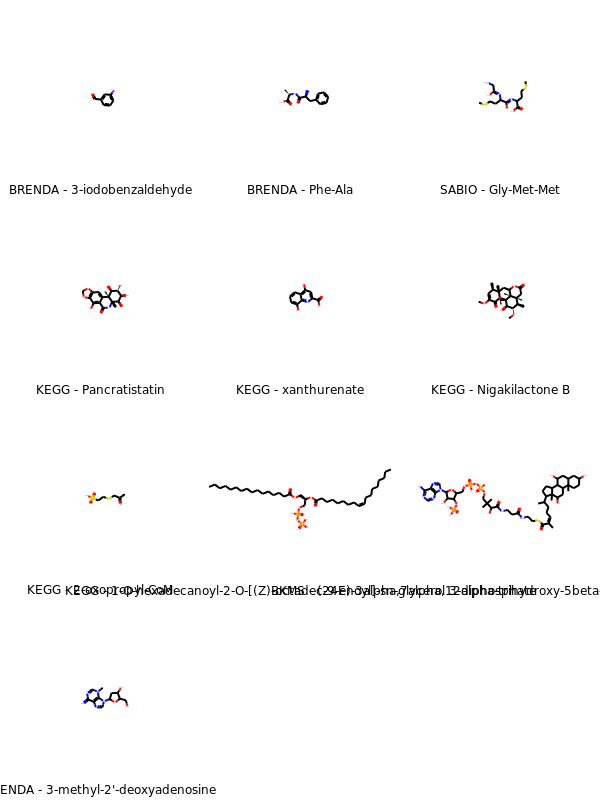

In [37]:
smiles_list = []
n_list = []
for ch in np.arange(10):
    m = random.choice(mol_list)
    print(m.name)
    n_list.append(m.DB+' - '+m.name)
    print(m.DB)
    print(m.DB_list)
    try:
        print(m.PubchemId)
    except AttributeError:
        print('no pubchemID')
    try:
        print(m.chebiID)
    except AttributeError:
        print('no CHEBIID')
    try:
        print(m.SMILES)
        smiles_list.append(m.SMILES)
    except AttributeError:
        print('no SMILES')
    
    #input('done')
    
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)

# Debug and modification of RS database 

In [36]:
from rxn_syst import reaction, yield_rxn_syst, collect_RS_molecule_properties
import glob
directory = '/home/atarzia/psp/screening_results/biomin_search/'
molecule_db_dir = '/home/atarzia/psp/molecule_DBs/atarzia/'
molecules = glob.glob(molecule_db_dir+'ATRS_*.gpkl')
count = 0
rs_pkls_done = []

In [37]:
for rs in yield_rxn_syst(directory):
    count += 1
    if rs.pkl in rs_pkls_done:
        continue
    rs_pkls_done.append(rs.pkl)
    if rs.skip_rxn is True:
        continue
    print('-----', count, '---', rs.pkl)
    if rs.components is None:
        continue
    for m in rs.components:
        print(m.name, m.role)
        print(m.SMILES)
        try:
            print(m.pkl)
        except AttributeError:
            print('no pkl')
    rs.mol_collected = False
    collect_RS_molecule_properties(rs=rs, output_dir=directory,
                                   mol_db_dir=molecule_db_dir,
                                   molecules=molecules, count=0,
                                   react_syst_files=[])
    for m in rs.components:
        print(m.pkl)

----- 2 --- sRS-1_1_3_4-SABIO-6101.gpkl
D-Glucono-1,5-lactone product
O=C1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
beta-D-Glucose reactant
OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
H2O2 product
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
O2 reactant
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
component: D-Glucono-1,5-lactone
component: beta-D-Glucose
component: H2O2
component: O2
checking rxn 0 of 0
-----
sRS-1_1_3_4-SABIO-6101.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
found - beta-D-Glucose
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
found - D-Glucono-1,5-lactone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
/hom

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_277.gpkl
found - 3-deoxy-D-glucose
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_278.gpkl
found - 3-deoxy-D-glucono-1,5-lactone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_277.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_278.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 57 --- sRS-1_11_1_6-SABIO-44765.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: O2
component: H2O2
checking rxn 0 of 0
-----
sRS-1_11_1_6-SABIO-44765.gpkl
/home/atarzia/psp/molecule_DBs

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
found - beta-D-Glucose
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
found - D-Glucono-1,5-lactone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
----- 89 --- sRS-1_11_1_7-BKMS-11029.gpkl
ascorbate reactant
C(C(C1C(=C(C(=O)O1)O)O)O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
dehydroascorbic acid product
O=C1OC(C(O)CO)C(=O)C1=O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: ascorbate
component: H2O2
component: dehydroascorbic acid
component: H2O
checking rxn 0 of 0
-----
sRS-1_11_1_7-

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_190.gpkl
found - ethyl butyrate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_190.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_191.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_111.gpkl
----- 130 --- sRS-1_11_1_6-SABIO-42263.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: O2
component: H2O2
checking rxn 0 of 0
-----
sRS-1_11_1_6-SABIO-42263.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/a

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 190 --- sRS-1_1_3_4-SABIO-31814.gpkl
H2O2 product
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
beta-D-Glucose reactant
OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 reactant
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
D-Glucono-1,5-lactone product
O=C1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O2
component: beta-D-Glucose
component: O2
component: D-Glucono-1,5-lactone
checking rxn 0 of 0
-----
sRS-1_1_3_4-SABIO-31814.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
found - beta-D-Glucose
/home/atarz

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
found - beta-D-Glucose
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
found - D-Glucono-1,5-lactone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
----- 230 --- sRS-3_5_1_5-BRENDA-BR5.gpkl
hydroxyurea reactant
C(=O)(N)NO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
HCO3- product
O=C([O-])O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
NH4+ product
[NH4+]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
NH2OH product
NO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: hydroxyurea
component: HCO3-
component: NH4+
component: NH2OH
checking rxn 0 of 0
-----
sRS-3_5_1_5-BRENDA-BR5.gpkl
/home/atarzia/psp/molecule_DBs/a

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_157.gpkl
found - p-nitrophenyl acetate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_73.gpkl
found - acetic acid
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_27.gpkl
found - p-nitrophenol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_157.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_27.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_73.gpkl
----- 293 --- sRS-1_1_3_4-BRENDA-BR23.gpkl
6-deoxy-D-glucose reactant
CC(O)C(O)C(O)C(O)C=O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 reactant
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
6-deoxy-D-glucono-1,5-lactone product
C[C@H]1OC(=O)[C@H](O)[C@@H](O)[C@@H]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 product
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: 6-de

found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 345 --- sRS-1_11_1_6-SABIO-44704.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: O2
component: H2O2
checking rxn 0 of 0
-----
sRS-1_11_1_6-SABIO-44704.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 346 --- 

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_111.gpkl
found - butyrate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_110.gpkl
found - p-nitrophenyl butyrate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_27.gpkl
found - p-nitrophenol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_110.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_27.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_111.gpkl
----- 377 --- sRS-1_11_1_7-BRENDA-BR59.gpkl
Cl- reactant
[Cl-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
HClO product
OCl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: Cl-
component: H2O2
component: HClO
component: H2O
checking rxn 0 of 0
-----
sRS-1_11_1_7-BRENDA-BR59.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_168.gpkl
fo

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 443 --- sRS-1_1_3_4-BKMS-14182.gpkl
D-xylose reactant
C1C(C(C(C(O1)O)O)O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 reactant
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
2-keto-D-xylose product
O=CC(=O)[C@@H](O)[C@H](O)CO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 product
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: D-xylose
component: O2
component: 2-keto-D-xylose
component: H2O2
checking rxn 0 of 0
-----
sRS-1_1_3_4-BKMS-14182.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/mo

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
found - beta-D-Glucose
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
found - D-Glucono-1,5-lactone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_46.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
----- 500 --- sRS-1_1_5_2-BRENDA-BR65.gpkl
L-arabinose reactant
C1C(C(C(C(O1)O)O)O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
2,6-dichlorophenolindophenol reactant
O=C1C(Cl)=CC(=Nc2ccc(O)cc2)C=C1Cl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
L-arabinono-1,5-lactone product
C1C(C(C(C(=O)O1)O)O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
reduced 2,6-dichlorophenolindophenol product
C1=CC(=CC=C1NC2=CC(=C(C(=C2)Cl)O)Cl)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
c

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_227.gpkl
found - benzoquinone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_226.gpkl
found - hydroquinone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_142.gpkl
found - beta-D-glucose
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
found - D-glucono-1,5-lactone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_142.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_227.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_47.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_226.gpkl
----- 529 --- sRS-3_1_1_6-BRENDA-BR121.gpkl
p-nitrophenyl acetate reactant
CC(=O)Oc1ccc(cc1)[N+]([O-])=O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
p-nitrophenol product
O=[N+]([O-])c1ccc(O)cc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
acetate product
CC(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: p-nitrophenyl acetate
component: H2O
component: p-nitrophenol
c

found - formaldehyde
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_52.gpkl
found - methanol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_52.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_56.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
----- 558 --- sRS-3_1_1_3-BRENDA-BR13.gpkl
tert-butyl octanoate reactant
CCCCCCCC(=O)OC(C)(C)C
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
tert-butanol product
CC(C)(C)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
octanoate product
CCCCCCCC(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: tert-butyl octanoate
component: H2O
component: tert-butanol
component: octanoate
checking rxn 0 of 0
-----
sRS-3_1_1_3-BRENDA-BR13.gpkl
/home/atarzia/psp/molecule_DBs/atarzia

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 609 --- sRS-1_13_12_4-BKMS-10874.gpkl
(S)-malate(2-) reactant
O=C([O-])C[C@H](O)C(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 reactant
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
oxaloacetate product
C(C(=O)C(=O)O)C(=O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 product
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: (S)-malate(2-)
component: O2
component: oxaloacetate
component: H2O2
checking rxn 0 of 0
-----
sRS-1_13_12_4-BKMS-10874.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_82.gpkl
found - (S)-malate(2-)
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2

found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 657 --- sRS-1_1_5_2-BRENDA-BR70.gpkl
D-mannose reactant
C(C1C(C(C(C(O1)O)O)O)O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
2,6-dichloroindophenol reactant
O=C1C(Cl)=CC(=Nc2ccc(O)cc2)C=C1Cl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
D-mannono-1,5-lactone product
C(C1C(C(C(C(=O)O1)O)O)O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
reduced 2,6-dichlorophenolindophenol product
C1=CC(=CC=C1NC2=CC(=C(C(=C2)Cl)O)Cl)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: D-mannose
component: 2,6-dichloroindophenol
component: D-mannono-1,5-lactone
component: reduced 2,6-dichlorophenolindophenol
checking rxn 0 of 0
-----
sRS-1_1_5_2-BRENDA-BR70.gpkl
/home/atar

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_124.gpkl
found - N-(4-methylphenyl)-2-phenylacetamide
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_125.gpkl
found - 2-amino-4-methylphenol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_34.gpkl
found - phenylacetate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_124.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_34.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_125.gpkl
----- 714 --- sRS-3_5_1_5-SABIO-38314.gpkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
NH3 product
N
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
Urea reactant
N=C(N)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
CO2 product
O=C=O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: NH3
component: Urea
component: CO2
checking rxn 0 of 0
-----
sRS-3_5_1_5-SABIO-38314.gpkl
/home/atarzia/psp/molecule_D

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_422.gpkl
found - 2-Dehydro-D-glucose
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_442.gpkl
found - 2-Dehydro-D-glucono-1,5-lactone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_442.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_422.gpkl
----- 753 --- sRS-1_11_1_6-SABIO-44712.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: O2
component: H2O2
checking rxn 0 of 0
-----
sRS-1_11_1_6-SABIO-44712.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzi

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
found - Acetate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12.gpkl
found - 2-Acetamidofluorene
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11.gpkl
found - 2-Aminofluorene
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
----- 797 --- sRS-1_11_1_6-SABIO-44728.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: O2
component: H2O2
checking rxn 0 of 0
-----
sRS-1_11_1_6-SABIO-44728.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 857 --- sRS-3_5_1_11-SABIO-14946.gpkl
2-Phenylacetamide reactant
NC(=O)Cc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
NH3 product
N
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
Phenylacetic acid product
O=C(O)Cc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: 2-Phenylacetamide
component: NH3
component: Phenylacetic acid
component: H2O
checking rxn 0 of 0
-----
sRS-3_5_1_11-SABIO-14946.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
found - NH3
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_30.gpkl
found - Phenylacetic acid

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 901 --- sRS-3_1_1_3-BRENDA-BR217.gpkl
beta-naphthyl butyrate reactant
C12=CC=CC=C2C=CC(=C1)OC(=O)CCC
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
beta-naphthol product
Oc1ccc2ccccc2c1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
butyrate product
CCCC(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: beta-naphthyl butyrate
component: H2O
component: beta-naphthol
component: butyrate
checking rxn 0 of 0
-----
sRS-3_1_1_3-BRENDA-BR217.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_111.gpkl
found - butyrate
/home/atarzia/psp/molecule_DBs/a

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 976 --- sRS-1_1_5_2-BRENDA-BR68.gpkl
D-galactose reactant
C(C1C(C(C(C(O1)O)O)O)O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
2,6-dichloroindophenol reactant
O=C1C(Cl)=CC(=Nc2ccc(O)cc2)C=C1Cl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
D-galactono-1,5-lactone product
O=C1OC(CO)C(O)C(O)C1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
reduced 2,6-dichlorophenolindophenol product
C1=CC(=CC=C1NC2=CC(=C(C(=C2)Cl)O)Cl)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: D-galactose
component: 2,6-dichloroindophenol
component: D-galactono-1,5-lactone
component: reduced 2,6-dichlorophenolindophenol
checking r

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_107.gpkl
found - 2,6-dichlorophenolindophenol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_109.gpkl
found - reduced 2,6-dichlorophenolindophenol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_105.gpkl
found - D-xylose
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_105.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_107.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_106.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_109.gpkl
----- 1013 --- sRS-1_11_1_7-BRENDA-BR10.gpkl
ascorbate reactant
C(C(C1C(=C(C(=O)O1)O)O)O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
dehydroascorbic acid product
O=C1OC(C(O)CO)C(=O)C1=O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: ascorbate
component: H2O2
component: dehydroascorbic acid
component: H2O
checking rxn 0 of 0
-----
sRS-1_11_1_7-BRENDA-BR10.gpkl

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 1064 --- sRS-3_5_1_11-SABIO-14944.gpkl
2-Phenylacetamide reactant
NC(=O)Cc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
NH3 product
N
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
Phenylacetic acid product
O=C(O)Cc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: 2-Phenylacetamide
component: NH3
component: Phenylacetic acid
component: H2O
checking rxn 0 of 0
-----
sRS-3_5_1_11-SABIO-14944.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
found - NH3
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_30.gpkl
found - Phenylacetic aci

found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_155.gpkl
found - p-phenylenediamine
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_155.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_156.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
----- 1118 --- sRS-1_11_1_6-SABIO-44783.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: O2
component: H2O2
checking rxn 0 of 0
-----
sRS-1_11_1_6-SABIO-44783.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
---

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 1168 --- sRS-1_11_1_6-SABIO-44719.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: O2
component: H2O2
checking rxn 0 of 0
-----
sRS-1_11_1_6-SABIO-44719.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia

found - hydrazine
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_379.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_34.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_380.gpkl
----- 1216 --- sRS-3_1_1_6-BRENDA-BR32.gpkl
4-nitrophenyl acetate reactant
CC(=O)Oc1ccc(cc1)[N+]([O-])=O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
4-nitrophenol product
O=[N+]([O-])c1ccc(O)cc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
acetate product
CC(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: 4-nitrophenyl acetate
component: H2O
component: 4-nitrophenol
component: acetate
checking rxn 0 of 0
-----
sRS-3_1_1_6-BRENDA-BR32.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
found - acetate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_157.gpkl
found - 4-nitrophenyl acetate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/ho

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_371.gpkl
found - formate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_27.gpkl
found - 4-nitrophenol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_370.gpkl
found - 4-nitrophenyl formate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_370.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_27.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_371.gpkl
----- 1277 --- sRS-3_5_1_5-SABIO-33387.gpkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
NH3 product
N
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
Urea reactant
N=C(N)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
CO2 product
O=C=O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: NH3
component: Urea
component: CO2
checking rxn 0 of 0
-----
sRS-3_5_1_5-SABIO-33387.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5.gpkl
found 

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
found - Acetate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12.gpkl
found - 2-Acetamidofluorene
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11.gpkl
found - 2-Aminofluorene
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
----- 1328 --- sRS-3_1_1_3-SABIO-49706.gpkl
Phenacetin reactant
CCOc1ccc(N=C(C)O)cc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
Acetate product
CC(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
p-Phenetidin product
CCOC1=CC=C(C=C1)N
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: Phenacetin
component: Acetate
component: H2O
component: p-Phenetidin
checking rxn 0 of 0
-----
sRS-3_1_1_3-SABIO-

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 1366 --- sRS-3_1_1_3-SABIO-49729.gpkl
Phenacetin reactant
CCOc1ccc(N=C(C)O)cc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
Acetate product
CC(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
p-Phenetidin product
CCOC1=CC=C(C=C1)N
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: Phenacetin
component: Acetate
component: H2O
component: p-Phenetidin
checking rxn 0 of 0
-----
sRS-3_1_1_3-SABIO-49729.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_66.gpkl
found - p-Phenetidin
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
found - Acetate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_65.gpkl
found - Phenacetin
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_65.gpkl
/ho

found - urea
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
found - NH3
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
found - CO2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_249.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
----- 1417 --- sRS-1_11_1_7-BRENDA-BR265.gpkl
styrene reactant
C=Cc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
styrene epoxide product
c1ccc(C2CO2)cc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: styrene
component: H2O2
component: styrene epoxide
component: H2O
checking rxn 0 of 0
-----
sRS-1_11_1_7-BRENDA-BR265.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/at

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_52.gpkl
found - Methanol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_218.gpkl
found - D-Phenylglycine
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_232.gpkl
found - D-Phenylglycine methyl ester
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_232.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_218.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_52.gpkl
----- 1459 --- sRS-1_11_1_7-BRENDA-BR53.gpkl
Cl- reactant
[Cl-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
HOCl product
OCl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: Cl-
component: H2O2
component: HOCl
component: H2O
checking rxn 0 of 0
-----
sRS-1_11_1_7-BRENDA-BR53.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_16

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_16.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_228.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_170.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
----- 1500 --- sRS-3_1_1_6-BRENDA-BR100.gpkl
beta-naphthyl acetate reactant
CC(=O)OC1=CC2=CC=CC=C2C=C1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
beta-naphthol product
Oc1ccc2ccccc2c1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
acetate product
CC(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: beta-naphthyl acetate
component: H2O
component: beta-naphthol
component: acetate
checking rxn 0 of 0
-----
sRS-3_1_1_6-BRENDA-BR100.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_275.gpkl
found - beta-naphthol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
found - acetate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_133.gpkl
found - (S)-lactate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_230.gpkl
found - pyruvate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_133.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_230.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 1548 --- sRS-1_11_1_7-BRENDA-BR217.gpkl
styrene reactant
C=Cc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
styrene oxide product
c1ccc(C2CO2)cc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
benzaldehyde product
O=Cc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
phenylacetaldehyde product
O=CCc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarz

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5.gpkl
found - Urea
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
found - NH3
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
found - CO2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
----- 1578 --- sRS-1_11_1_6-SABIO-44759.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: O2
component: H2O2
checking rxn 0 of 0
-----
sRS-1_11_1_6-SABIO-44759.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2


/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 1596 --- sRS-3_5_1_11-SABIO-14943.gpkl
2-Phenylacetamide reactant
NC(=O)Cc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
NH3 product
N
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
Phenylacetic acid product
O=C(O)Cc1ccccc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: 2-Phenylacetamide
component: NH3
component: Phenylacetic acid
component: H2O
checking rxn 0 of 0
-----
sRS-3_5_1_11-SABIO-14943.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
found - NH3
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_30.gpkl
found - Phenylacetic aci

found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 1641 --- sRS-1_1_3_4-BKMS-1646.gpkl
L-sorbose reactant
C1C(C(C(C(O1)(CO)O)O)O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 reactant
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
5-dehydro-D-fructose product
O=C(CO)[C@@H](O)[C@H](O)C(=O)CO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 product
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: L-sorbose
component: O2
component: 5-dehydro-D-fructose
component: H2O2
checking rxn 0 of 0
-----
sRS-1_1_3_4-BKMS-1646.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_405.gpkl
found - 5-dehydro-D-fructose
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/at

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 1702 --- sRS-3_5_1_5-SABIO-60768.gpkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
NH3 product
N
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
Urea reactant
N=C(N)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
CO2 product
O=C=O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: NH3
component: Urea
component: CO2
checking rxn 0 of 0
-----
sRS-3_5_1_5-SABIO-60768.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5.gpkl
found - Urea
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
found - NH3
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
found - CO2
/home/atarzia/psp/molec

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_320.gpkl
found - cyanide
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_319.gpkl
found - acrylonitrile
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_319.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_320.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
----- 1744 --- sRS-1_1_3_4-BRENDA-BR18.gpkl
alpha-D-glucose reactant
O[C@H:1]1O[C@H:5]([CH2:6]O)[C@@H:4](O)[C@H:3](O)[C@H:2]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 reactant
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
D-glucono-1,5-lactone product
O=C1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 product
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
componen

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_111.gpkl
found - butyrate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_27.gpkl
found - 4-nitrophenol
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_390.gpkl
found - 4-nitrophenylbutyrate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_390.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_27.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_111.gpkl
----- 1788 --- sRS-3_1_1_3-BRENDA-BR268.gpkl
lauric acid reactant
CCCCCCCCCCCC(=O)O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
1-propanol reactant
CCCO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
propyl laurate product
CCCCCCCCCCCC(=O)OCCC
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: lauric acid
component: 1-propanol
component: propyl laurate
component: H2O
checking rxn 0 of 0
-----
sRS-3_

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5.gpkl
found - Urea
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
found - NH3
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
found - CO2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
----- 1831 --- sRS-1_1_3_4-SABIO-32726.gpkl
H2O2 product
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
L-Sorbose reactant
OCC1(O)OC[C@H](O)[C@@H](O)[C@@H]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 reactant
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
5-Dehydro-D-fructose product
O=C(CO)[C@@H](O)[C@H](O)C(=O)CO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O2
component: L-Sorbose
component: O2
component: 5-Dehydro-D-fructose
checking rxn 0 of 0
-----
sRS-1_1_3_4-SABIO-32726.gpk

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_227.gpkl
found - benzoquinone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_226.gpkl
found - hydroquinone
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_226.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_227.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
----- 1874 --- sRS-3_1_1_3-BRENDA-BR211.gpkl
1-naphthyl acetate reactant
CC(=O)OC1=CC=CC2=CC=CC=C21
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
1-naphthol product
Oc1cccc2ccccc12
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
acetate product
CC(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: 1-naphthyl acetate
component: H2O
component: 1-naphthol
component: acetate
checking rxn 0 of 0
-----
sRS-3_1_1_3-

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_66.gpkl
found - p-Phenetidin
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
found - Acetate
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_65.gpkl
found - Phenacetin
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_65.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_66.gpkl
----- 1896 --- sRS-1_1_3_4-SABIO-31816.gpkl
H2O2 product
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
beta-D-Glucose reactant
OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 reactant
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
D-Glucono-1,5-lactone product
O=C1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O2
component: beta-D-Glucose
component: O2
component: D-Glucono-1,5-lactone


found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 1945 --- sRS-1_11_1_6-SABIO-44715.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O
component: O2
component: H2O2
checking rxn 0 of 0
-----
sRS-1_11_1_6-SABIO-44715.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 1950 --- sRS-1_11_1_6-SABIO-44756.gpkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzi

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5.gpkl
found - Urea
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
found - NH3
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
found - CO2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4.gpkl
----- 1995 --- sRS-1_11_1_6-BKMS-2084.gpkl
H2O2 reactant
OO
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
O2 product
[O]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O product
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: H2O2
component: O2
component: H2O
checking rxn 0 of 0
-----
sRS-1_11_1_6-BKMS-2084.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/hom

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
found - H2O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
found - H2O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
found - O2
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3.gpkl
----- 2039 --- sRS-3_1_1_3-SABIO-49699.gpkl
Phenacetin reactant
CCOc1ccc(N=C(C)O)cc1
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
Acetate product
CC(=O)[O-]
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
H2O reactant
O
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
p-Phenetidin product
CCOC1=CC=C(C=C1)N
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_13549.pkl
component: Phenacetin
component: Acetate
component: H2O
component: p-Phenetidin
checking rxn 0 of 0
-----
sRS-3_1_1_3-SABIO-49699.gpkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_66.gpkl
found - p-Phenetidin
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10.gpkl
found - Acetate


# Debug and modification of molecule database

In [5]:
from PUBCHEM_IO import get_logP_from_name, get_complexity_from_name, get_IUPAC_from_name
from molecule import yield_molecules, load_molecule
directory = '/home/atarzia/psp/molecule_DBs/atarzia/'

In [6]:
for j, i in enumerate(yield_molecules(directory=directory)):
    if i.pkl == directory+'ATRS_1.pkl':
        print(i.name)
        #break

In [7]:
caught = []
for j, i in enumerate(yield_molecules(directory=directory)):
    print('doing -----', j)
    if '\n' in str(i.SMILES):
        print(i.name)
        print('SMILES', i.SMILES)
        caught.append(i)

doing ----- 0
doing ----- 1
doing ----- 2
doing ----- 3
doing ----- 4
doing ----- 5
doing ----- 6
doing ----- 7
doing ----- 8
doing ----- 9
doing ----- 10
(13E)-8alpha-hydroxylabd-13-en-15-yl diphosphate
SMILES CC(=CCOP(=O)(O)OP(=O)(O)O)CCC1C2(CCCC(C2CCC1(C)O)(C)C)C
CC(=CCOP(=O)([O-])OP(=O)([O-])[O-])CCC1C2(CCCC(C2CCC1(C)O)(C)C)C
doing ----- 11
doing ----- 12
doing ----- 13
doing ----- 14
doing ----- 15
doing ----- 16
doing ----- 17
doing ----- 18
doing ----- 19
doing ----- 20
doing ----- 21
doing ----- 22
doing ----- 23
doing ----- 24
doing ----- 25
doing ----- 26
doing ----- 27
doing ----- 28
doing ----- 29
doing ----- 30
doing ----- 31
doing ----- 32
doing ----- 33
doing ----- 34
doing ----- 35
doing ----- 36
doing ----- 37
doing ----- 38
doing ----- 39
doing ----- 40
doing ----- 41
doing ----- 42
doing ----- 43
doing ----- 44
doing ----- 45
doing ----- 46
doing ----- 47
doing ----- 48
doing ----- 49
doing ----- 50
doing ----- 51
doing ----- 52
doing ----- 53
doing ----- 54
doing --

doing ----- 701
doing ----- 702
doing ----- 703
doing ----- 704
doing ----- 705
doing ----- 706
doing ----- 707
doing ----- 708
doing ----- 709
doing ----- 710
doing ----- 711
doing ----- 712
doing ----- 713
doing ----- 714
doing ----- 715
doing ----- 716
doing ----- 717
doing ----- 718
doing ----- 719
doing ----- 720
doing ----- 721
doing ----- 722
doing ----- 723
doing ----- 724
doing ----- 725
doing ----- 726
doing ----- 727
doing ----- 728
doing ----- 729
doing ----- 730
doing ----- 731
doing ----- 732
doing ----- 733
doing ----- 734
doing ----- 735
doing ----- 736
doing ----- 737
doing ----- 738
digalacturonate
SMILES C1(C(C(OC(C1O)OC2C(C(C(OC2C(=O)O)O)O)O)C(=O)O)O)O
C1(C(C(OC(C1O)OC2C(C(C(OC2C(=O)O)O)O)O)C(=O)O)O)O
C1(C(C(OC(C1O)OC2C(C(C(OC2C(=O)O)O)O)O)C(=O)O)O)O
C1(C(C(OC(C1O)OC2C(C(C(OC2C(=O)O)O)O)O)C(=O)O)O)O
doing ----- 739
doing ----- 740
doing ----- 741
doing ----- 742
doing ----- 743
doing ----- 744
doing ----- 745
doing ----- 746
doing ----- 747
doing ----- 748
doing ---

doing ----- 1214
doing ----- 1215
doing ----- 1216
doing ----- 1217
doing ----- 1218
phytanol
SMILES CC(C)CCCC(C)CCCC(C)CCCC(C)CCO
CC(C)CCCC(C)CCCC(C)CCCC(C)CCO
doing ----- 1219
doing ----- 1220
doing ----- 1221
doing ----- 1222
doing ----- 1223
doing ----- 1224
doing ----- 1225
doing ----- 1226
doing ----- 1227
doing ----- 1228
doing ----- 1229
ppGpp
SMILES C1=NC2=C(N1C3C(C(C(O3)COP(=O)(O)OP(=O)(O)O)OP(=O)(O)OP(=O)(O)O)O)NC(=NC2=O)N
C1=NC2=C(N1C3C(C(C(O3)COP(=O)([O-])OP(=O)(O)[O-])OP(=O)([O-])OP(=O)([O-])[O-])O)NC(=NC2=O)N
doing ----- 1230
doing ----- 1231
doing ----- 1232
doing ----- 1233
doing ----- 1234
doing ----- 1235
doing ----- 1236
doing ----- 1237
doing ----- 1238
ascorbate
SMILES C(C(C1C(=C(C(=O)O1)O)O)O)O
C(C(C1C(=C(C(=O)O1)[O-])O)O)O
doing ----- 1239
doing ----- 1240
doing ----- 1241
doing ----- 1242
methyl ricinoleate
SMILES CCCCCCC(CC=CCCCCCCCC(=O)OC)O
CCCCCCC(CC=CCCCCCCCC(=O)OC)O
CCCCCCC(CC=CCCCCCCCC(=O)OC)O
CCCCCCC(CC=CCCCCCCCC(=O)OC)O
CCCCCCC(CC=CCCCCCCCC(=O)OC)O
CCCC

doing ----- 1820
doing ----- 1821
doing ----- 1822
doing ----- 1823
doing ----- 1824
doing ----- 1825
doing ----- 1826
doing ----- 1827
doing ----- 1828
doing ----- 1829
doing ----- 1830
doing ----- 1831
doing ----- 1832
doing ----- 1833
doing ----- 1834
doing ----- 1835
doing ----- 1836
doing ----- 1837
doing ----- 1838
doing ----- 1839
doing ----- 1840
doing ----- 1841
doing ----- 1842
doing ----- 1843
doing ----- 1844
doing ----- 1845
doing ----- 1846
doing ----- 1847
doing ----- 1848
doing ----- 1849
doing ----- 1850
doing ----- 1851
doing ----- 1852
doing ----- 1853
doing ----- 1854
doing ----- 1855
doing ----- 1856
doing ----- 1857
doing ----- 1858
doing ----- 1859
doing ----- 1860
doing ----- 1861
doing ----- 1862
Gly-Gly-Tyr-Arg
SMILES C1=CC(=CC=C1CC(C(=O)NC(CCCN=C(N)N)C(=O)O)NC(=O)CNC(=O)CN)O
C1=CC(=CC=C1CC(C(=O)NC(CCCN=C(N)N)C(=O)O)NC(=O)CNC(=O)CN)O.O.O
doing ----- 1863
doing ----- 1864
doing ----- 1865
doing ----- 1866
doing ----- 1867
doing ----- 1868
doing ----- 1869
methy

doing ----- 2382
doing ----- 2383
doing ----- 2384
doing ----- 2385
doing ----- 2386
doing ----- 2387
doing ----- 2388
doing ----- 2389
doing ----- 2390
doing ----- 2391
doing ----- 2392
hyaluronate hexasaccharide
SMILES CC(=O)NC1C(C(C(OC1O)CO)O)OC2C(C(C(C(O2)C(=O)O)OC3C(C(C(C(O3)CO)O)OC4C(C(C(C(O4)C(=O)O)OC5C(C(C(C(O5)CO)O)OC6C(C(C(C(O6)C(=O)O)O)O)O)NC(=O)C)O)O)NC(=O)C)O)O
CC(=O)NC1C(C(C(OC1O)CO)O)OC2C(C(C(C(O2)C(=O)O)OC3C(C(C(C(O3)CO)O)OC4C(C(C(C(O4)C(=O)O)OC5C(C(C(C(O5)CO)O)OC6C(C(C(C(O6)C(=O)O)O)O)O)NC(=O)C)O)O)NC(=O)C)O)O
doing ----- 2393
doing ----- 2394
doing ----- 2395
doing ----- 2396
doing ----- 2397
doing ----- 2398
doing ----- 2399
doing ----- 2400
doing ----- 2401
doing ----- 2402
doing ----- 2403
doing ----- 2404
doing ----- 2405
doing ----- 2406
doing ----- 2407
doing ----- 2408
doing ----- 2409
doing ----- 2410
doing ----- 2411
doing ----- 2412
doing ----- 2413
doing ----- 2414
doing ----- 2415
doing ----- 2416
doing ----- 2417
doing ----- 2418
doing ----- 2419
doing --

doing ----- 2937
doing ----- 2938
doing ----- 2939
doing ----- 2940
doing ----- 2941
doing ----- 2942
doing ----- 2943
doing ----- 2944
doing ----- 2945
doing ----- 2946
doing ----- 2947
doing ----- 2948
2-dehydro-3-deoxy-L-fuconate
SMILES CC(C(CC(=O)C(=O)O)O)O
CC(C(CC(=O)C(=O)[O-])O)O
doing ----- 2949
doing ----- 2950
doing ----- 2951
doing ----- 2952
doing ----- 2953
doing ----- 2954
doing ----- 2955
doing ----- 2956
doing ----- 2957
dTDP-4-dehydro-6-deoxy-alpha-D-glucopyranose
SMILES CC1C(=O)C(C(C(O1)OP(=O)(O)OP(=O)(O)OCC2C(CC(O2)N3C=C(C(=O)NC3=O)C)O)O)O
CC1C(=O)C(C(C(O1)OP(=O)([O-])OP(=O)([O-])OCC2C(CC(O2)N3C=C(C(=O)NC3=O)C)O)O)O
doing ----- 2958
doing ----- 2959
doing ----- 2960
doing ----- 2961
doing ----- 2962
doing ----- 2963
doing ----- 2964
doing ----- 2965
doing ----- 2966
doing ----- 2967
doing ----- 2968
doing ----- 2969
doing ----- 2970
doing ----- 2971
doing ----- 2972
doing ----- 2973
doing ----- 2974
doing ----- 2975
doing ----- 2976
doing ----- 2977
doing ----- 2978
d

doing ----- 3507
2',2'-difluorodeoxyuridine
SMILES C1=CN(C(=O)NC1=O)C2C(C(C(O2)CO)O)(F)F
C1=CN(C(=O)NC1=O)C2C(C(C(O2)CO)O)(F)F
C1=CN(C(=O)NC1=O)C2C(C(C(O2)CO)O)(F)F
doing ----- 3508
doing ----- 3509
doing ----- 3510
doing ----- 3511
doing ----- 3512
doing ----- 3513
doing ----- 3514
doing ----- 3515
doing ----- 3516
doing ----- 3517
doing ----- 3518
doing ----- 3519
doing ----- 3520
doing ----- 3521
doing ----- 3522
doing ----- 3523
doing ----- 3524
doing ----- 3525
doing ----- 3526
doing ----- 3527
doing ----- 3528
doing ----- 3529
doing ----- 3530
doing ----- 3531
doing ----- 3532
doing ----- 3533
doing ----- 3534
doing ----- 3535
phenylpyruvate
SMILES C1=CC=C(C=C1)CC(=O)C(=O)O
C1=CC=C(C=C1)CC(=O)C(=O)[O-]
doing ----- 3536
doing ----- 3537
doing ----- 3538
doing ----- 3539
doing ----- 3540
doing ----- 3541
doing ----- 3542
doing ----- 3543
doing ----- 3544
doing ----- 3545
doing ----- 3546
doing ----- 3547
doing ----- 3548
5-O-alpha-D-glucopyranosyl-D-fructose
SMILES C(C1C(C(C(C(O1)O

doing ----- 4136
doing ----- 4137
doing ----- 4138
doing ----- 4139
doing ----- 4140
doing ----- 4141
doing ----- 4142
doing ----- 4143
doing ----- 4144
doing ----- 4145
doing ----- 4146
doing ----- 4147
doing ----- 4148
doing ----- 4149
doing ----- 4150
doing ----- 4151
doing ----- 4152
doing ----- 4153
doing ----- 4154
doing ----- 4155
doing ----- 4156
doing ----- 4157
doing ----- 4158
doing ----- 4159
doing ----- 4160
doing ----- 4161
doing ----- 4162
doing ----- 4163
doing ----- 4164
doing ----- 4165
doing ----- 4166
doing ----- 4167
doing ----- 4168
doing ----- 4169
doing ----- 4170
doing ----- 4171
doing ----- 4172
doing ----- 4173
doing ----- 4174
doing ----- 4175
doing ----- 4176
doing ----- 4177
doing ----- 4178
doing ----- 4179
doing ----- 4180
doing ----- 4181
doing ----- 4182
doing ----- 4183
doing ----- 4184
doing ----- 4185
doing ----- 4186
doing ----- 4187
doing ----- 4188
doing ----- 4189
doing ----- 4190
doing ----- 4191
doing ----- 4192
doing ----- 4193
doing ----- 41

doing ----- 4754
doing ----- 4755
doing ----- 4756
doing ----- 4757
doing ----- 4758
doing ----- 4759
doing ----- 4760
doing ----- 4761
doing ----- 4762
doing ----- 4763
doing ----- 4764
doing ----- 4765
doing ----- 4766
doing ----- 4767
doing ----- 4768
doing ----- 4769
doing ----- 4770
doing ----- 4771
doing ----- 4772
doing ----- 4773
S-o-nitrophenyl-L-cysteine
SMILES C1=CC=C(C(=C1)[N+](=O)[O-])SCC(C(=O)O)N
C1=CC=C(C(=C1)[N+](=O)[O-])SCC(C(=O)O)N
doing ----- 4774
doing ----- 4775
doing ----- 4776
doing ----- 4777
doing ----- 4778
doing ----- 4779
doing ----- 4780
doing ----- 4781
doing ----- 4782
doing ----- 4783
doing ----- 4784
doing ----- 4785
doing ----- 4786
doing ----- 4787
doing ----- 4788
doing ----- 4789
doing ----- 4790
doing ----- 4791
doing ----- 4792
doing ----- 4793
doing ----- 4794
doing ----- 4795
doing ----- 4796
doing ----- 4797
doing ----- 4798
doing ----- 4799
doing ----- 4800
glycerophosphocholine
SMILES C[N+](C)(C)CCOP(=O)([O-])OCC(CO)O
C[N+](C)(C)CCOP(=O)(O)OC

doing ----- 5406
doing ----- 5407
doing ----- 5408
doing ----- 5409
doing ----- 5410
doing ----- 5411
doing ----- 5412
doing ----- 5413
doing ----- 5414
doing ----- 5415
doing ----- 5416
doing ----- 5417
doing ----- 5418
doing ----- 5419
doing ----- 5420
doing ----- 5421
doing ----- 5422
doing ----- 5423
doing ----- 5424
doing ----- 5425
doing ----- 5426
doing ----- 5427
doing ----- 5428
doing ----- 5429
doing ----- 5430
doing ----- 5431
doing ----- 5432
doing ----- 5433
doing ----- 5434
doing ----- 5435
doing ----- 5436
doing ----- 5437
doing ----- 5438
doing ----- 5439
D-mannose 6-phosphate
SMILES C(C1C(C(C(C(O1)O)O)O)O)OP(=O)(O)O
C(C1C(C(C(C(O1)O)O)O)O)OP(=O)([O-])[O-]
doing ----- 5440
doing ----- 5441
doing ----- 5442
doing ----- 5443
doing ----- 5444
doing ----- 5445
doing ----- 5446
doing ----- 5447
doing ----- 5448
doing ----- 5449
doing ----- 5450
doing ----- 5451
doing ----- 5452
doing ----- 5453
doing ----- 5454
doing ----- 5455
doing ----- 5456
doing ----- 5457
doing ----- 5

doing ----- 5941
doing ----- 5942
doing ----- 5943
doing ----- 5944
doing ----- 5945
doing ----- 5946
doing ----- 5947
doing ----- 5948
doing ----- 5949
doing ----- 5950
cobamamide
SMILES CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)OP(=O)([O-])OC(C)CNC(=O)CCC4(C(C5C6(C(C(C(=N6)C(=C7C(C(C(=N7)C=C8C(C(C(=N8)C(=C4[N-]5)C)CCC(=O)N)(C)C)CCC(=O)N)(C)CC(=O)N)C)CCC(=O)N)(C)CC(=O)N)C)CC(=O)N)C)O.[CH2-]C1C(C(C(O1)N2C=NC3=C2N=CN=C3N)O)O.[Co+3]
CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)OP(=O)([O-])OC(C)CNC(=O)CCC4(C(C5C6(C(C(C(=N6)C(=C7C(C(C(=N7)C=C8C(C(C(=N8)C(=C4[N-]5)C)CCC(=O)N)(C)C)CCC(=O)N)(C)CC(=O)N)C)CCC(=O)N)(C)CC(=O)N)C)CC(=O)N)C)O.[CH2-]C1C(C(C(O1)N2C=NC3=C2N=CN=C3N)O)O.[Co+3]
CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)OP(=O)([O-])OC(C)CNC(=O)CCC4(C(C5C6(C(C(C(=N6)C(=C7C(C(C(=N7)C=C8C(C(C(=N8)C(=C4[N-]5)C)CCC(=O)N)(C)C)CCC(=O)N)(C)CC(=O)N)C)CCC(=O)N)(C)CC(=O)N)C)CC(=O)N)C)O.[CH2-]C1C(C(C(O1)N2C=NC3=C2N=CN=C3N)O)O.[Co]
CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)OP(=O)([O-])OC(C)CNC(=O)CCC4(C(C5C6(C(C(C(=N6)C(=C7

doing ----- 6501
doing ----- 6502
doing ----- 6503
doing ----- 6504
doing ----- 6505
doing ----- 6506
doing ----- 6507
doing ----- 6508
doing ----- 6509
doing ----- 6510
doing ----- 6511
doing ----- 6512
doing ----- 6513
doing ----- 6514
doing ----- 6515
doing ----- 6516
doing ----- 6517
doing ----- 6518
doing ----- 6519
doing ----- 6520
doing ----- 6521
doing ----- 6522
doing ----- 6523
doing ----- 6524
doing ----- 6525
doing ----- 6526
doing ----- 6527
doing ----- 6528
doing ----- 6529
doing ----- 6530
doing ----- 6531
doing ----- 6532
doing ----- 6533
doing ----- 6534
doing ----- 6535
doing ----- 6536
doing ----- 6537
doing ----- 6538
doing ----- 6539
doing ----- 6540
doing ----- 6541
doing ----- 6542
doing ----- 6543
doing ----- 6544
doing ----- 6545
doing ----- 6546
doing ----- 6547
doing ----- 6548
doing ----- 6549
doing ----- 6550
doing ----- 6551
doing ----- 6552
doing ----- 6553
doing ----- 6554
doing ----- 6555
doing ----- 6556
doing ----- 6557
doing ----- 6558
doing ----- 65

doing ----- 7135
doing ----- 7136
doing ----- 7137
doing ----- 7138
doing ----- 7139
doing ----- 7140
doing ----- 7141
doing ----- 7142
doing ----- 7143
doing ----- 7144
doing ----- 7145
doing ----- 7146
doing ----- 7147
doing ----- 7148
doing ----- 7149
doing ----- 7150
doing ----- 7151
doing ----- 7152
doing ----- 7153
doing ----- 7154
doing ----- 7155
doing ----- 7156
doing ----- 7157
doing ----- 7158
doing ----- 7159
doing ----- 7160
doing ----- 7161
doing ----- 7162
4-methylumbelliferyl-alpha-D-glucopyranoside
SMILES CC1=CC(=O)OC2=C1C=CC(=C2)OC3C(C(C(C(O3)CO)O)O)O
CC1=CC(=O)OC2=C1C=CC(=C2)OC3C(C(C(C(O3)CO)O)O)O
CC1=CC(=O)OC2=C1C=CC(=C2)OC3C(C(C(C(O3)CO)O)O)O
CC1=CC(=O)OC2=C1C=CC(=C2)OC3C(C(C(C(O3)CO)O)O)O
doing ----- 7163
doing ----- 7164
doing ----- 7165
doing ----- 7166
Glu-Asn
SMILES C(CC(=O)O)C(C(=O)NC(CC(=O)N)C(=O)O)N
C(CC(=O)O)C(C(=O)NC(CC(=O)N)C(=O)O)N
doing ----- 7167
doing ----- 7168
doing ----- 7169
doing ----- 7170
doing ----- 7171
doing ----- 7172
doing ----- 7173
doin

doing ----- 7559
doing ----- 7560
doing ----- 7561
doing ----- 7562
doing ----- 7563
doing ----- 7564
doing ----- 7565
doing ----- 7566
doing ----- 7567
doing ----- 7568
doing ----- 7569
doing ----- 7570
doing ----- 7571
doing ----- 7572
doing ----- 7573
doing ----- 7574
doing ----- 7575
doing ----- 7576
epicatechin
SMILES C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C3)O)O)O
C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C3)O)O)O
C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C3)O)O)O
C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C3)O)O)O
doing ----- 7577
doing ----- 7578
doing ----- 7579
doing ----- 7580
doing ----- 7581
doing ----- 7582
doing ----- 7583
doing ----- 7584
doing ----- 7585
doing ----- 7586
doing ----- 7587
doing ----- 7588
doing ----- 7589
doing ----- 7590
doing ----- 7591
doing ----- 7592
doing ----- 7593
doing ----- 7594
doing ----- 7595
doing ----- 7596
doing ----- 7597
doing ----- 7598
doing ----- 7599
doing ----- 7600
doing ----- 7601
doing ----- 7602
doing ----- 7603
doing ----- 7604
doing ----- 760

doing ----- 7911
doing ----- 7912
doing ----- 7913
doing ----- 7914
doing ----- 7915
doing ----- 7916
doing ----- 7917
doing ----- 7918
doing ----- 7919
doing ----- 7920
doing ----- 7921
doing ----- 7922
doing ----- 7923
doing ----- 7924
doing ----- 7925
doing ----- 7926
doing ----- 7927
doing ----- 7928
doing ----- 7929
doing ----- 7930
doing ----- 7931
doing ----- 7932
doing ----- 7933
doing ----- 7934
doing ----- 7935
doing ----- 7936
doing ----- 7937
doing ----- 7938
doing ----- 7939
doing ----- 7940
doing ----- 7941
doing ----- 7942
doing ----- 7943
doing ----- 7944
doing ----- 7945
doing ----- 7946
doing ----- 7947
doing ----- 7948
doing ----- 7949
doing ----- 7950
doing ----- 7951
doing ----- 7952
doing ----- 7953
doing ----- 7954
doing ----- 7955
doing ----- 7956
doing ----- 7957
doing ----- 7958
(+)-2-azabicyclo[2.2.1]hept-5-en-3-one
SMILES C1C2C=CC1NC2=O
C1C2C=CC1NC2=O
doing ----- 7959
doing ----- 7960
doing ----- 7961
doing ----- 7962
doing ----- 7963
doing ----- 7964
doing 

doing ----- 8287
doing ----- 8288
doing ----- 8289
doing ----- 8290
doing ----- 8291
doing ----- 8292
doing ----- 8293
doing ----- 8294
doing ----- 8295
doing ----- 8296
doing ----- 8297
doing ----- 8298
doing ----- 8299
doing ----- 8300
doing ----- 8301
doing ----- 8302
doing ----- 8303
doing ----- 8304
doing ----- 8305
doing ----- 8306
doing ----- 8307
doing ----- 8308
doing ----- 8309
doing ----- 8310
doing ----- 8311
doing ----- 8312
doing ----- 8313
doing ----- 8314
doing ----- 8315
doing ----- 8316
doing ----- 8317
doing ----- 8318
doing ----- 8319
doing ----- 8320
doing ----- 8321
doing ----- 8322
doing ----- 8323
doing ----- 8324
doing ----- 8325
doing ----- 8326
doing ----- 8327
doing ----- 8328
doing ----- 8329
doing ----- 8330
doing ----- 8331
doing ----- 8332
doing ----- 8333
doing ----- 8334
doing ----- 8335
doing ----- 8336
doing ----- 8337
doing ----- 8338
doing ----- 8339
doing ----- 8340
doing ----- 8341
doing ----- 8342
doing ----- 8343
doing ----- 8344
doing ----- 83

doing ----- 8795
doing ----- 8796
doing ----- 8797
doing ----- 8798
doing ----- 8799
doing ----- 8800
doing ----- 8801
doing ----- 8802
doing ----- 8803
doing ----- 8804
doing ----- 8805
doing ----- 8806
doing ----- 8807
doing ----- 8808
doing ----- 8809
doing ----- 8810
doing ----- 8811
doing ----- 8812
doing ----- 8813
doing ----- 8814
doing ----- 8815
doing ----- 8816
doing ----- 8817
doing ----- 8818
doing ----- 8819
doing ----- 8820
doing ----- 8821
doing ----- 8822
doing ----- 8823
doing ----- 8824
doing ----- 8825
doing ----- 8826
doing ----- 8827
doing ----- 8828
doing ----- 8829
doing ----- 8830
doing ----- 8831
doing ----- 8832
doing ----- 8833
doing ----- 8834
doing ----- 8835
doing ----- 8836
doing ----- 8837
doing ----- 8838
doing ----- 8839
doing ----- 8840
doing ----- 8841
doing ----- 8842
doing ----- 8843
doing ----- 8844
doing ----- 8845
doing ----- 8846
doing ----- 8847
doing ----- 8848
doing ----- 8849
doing ----- 8850
doing ----- 8851
doing ----- 8852
doing ----- 88

doing ----- 9404
Arg-Pro-Pro-Gly-Phe
SMILES C1CC(N(C1)C(=O)C2CCCN2C(=O)C(CCCN=C(N)N)N)C(=O)NCC(=O)NC(CC3=CC=CC=C3)C(=O)O
C1CC(N(C1)C(=O)C2CCCN2C(=O)C(CCCN=C(N)N)N)C(=O)NCC(=O)NC(CC3=CC=CC=C3)C(=O)O
doing ----- 9405
doing ----- 9406
doing ----- 9407
doing ----- 9408
doing ----- 9409
doing ----- 9410
doing ----- 9411
doing ----- 9412
doing ----- 9413
doing ----- 9414
doing ----- 9415
doing ----- 9416
pGlu-Leu-Tyr-Glu-Asn-Lys-Pro-Arg
SMILES CC(C)CC(C(=O)NC(CC1=CC=C(C=C1)O)C(=O)NC(CCC(=O)O)C(=O)NC(CC(=O)N)C(=O)NC(CCCCN)C(=O)N2CCCC2C(=O)NC(CCCN=C(N)N)C(=O)O)NC(=O)C3CCC(=O)N3
CC(C)CC(C(=O)NC(CC1=CC=C(C=C1)O)C(=O)NC(CCC(=O)O)C(=O)NC(CC(=O)N)C(=O)NC(CCCCN)C(=O)N2CCCC2C(=O)NC(CCCN=C(N)N)C(=O)O)NC(=O)C3CCC(=O)N3
doing ----- 9417
doing ----- 9418
doing ----- 9419
doing ----- 9420
doing ----- 9421
doing ----- 9422
doing ----- 9423
doing ----- 9424
doing ----- 9425
doing ----- 9426
doing ----- 9427
doing ----- 9428
doing ----- 9429
doing ----- 9430
doing ----- 9431
doing ----- 9432
doing ----- 9433

doing ----- 10042
doing ----- 10043
doing ----- 10044
doing ----- 10045
doing ----- 10046
doing ----- 10047
doing ----- 10048
doing ----- 10049
doing ----- 10050
doing ----- 10051
doing ----- 10052
doing ----- 10053
doing ----- 10054
doing ----- 10055
doing ----- 10056
doing ----- 10057
laminaritetraose
SMILES C(C1C(C(C(C(O1)O)O)OC2C(C(C(C(O2)CO)O)OC3C(C(C(C(O3)CO)O)OC4C(C(C(C(O4)CO)O)O)O)O)O)O)O
C(C1C(C(C(C(O1)O)O)OC2C(C(C(C(O2)CO)O)OC3C(C(C(C(O3)CO)O)OC4C(C(C(C(O4)CO)O)O)O)O)O)O)O
C(C1C(C(C(C(O1)O)O)OC2C(C(C(C(O2)CO)O)OC3C(C(C(C(O3)CO)O)OC4C(C(C(C(O4)CO)O)O)O)O)O)O)O
C(C1C(C(C(C(O1)O)O)OC2C(C(C(C(O2)CO)O)OC3C(C(C(C(O3)CO)O)OC4C(C(C(C(O4)CO)O)O)O)O)O)O)O
doing ----- 10058
doing ----- 10059
doing ----- 10060
doing ----- 10061
doing ----- 10062
doing ----- 10063
doing ----- 10064
doing ----- 10065
doing ----- 10066
doing ----- 10067
doing ----- 10068
doing ----- 10069
doing ----- 10070
doing ----- 10071
doing ----- 10072
doing ----- 10073
doing ----- 10074
doing ----- 10075
doing ----- 

doing ----- 10697
doing ----- 10698
doing ----- 10699
doing ----- 10700
doing ----- 10701
doing ----- 10702
doing ----- 10703
doing ----- 10704
doing ----- 10705
doing ----- 10706
doing ----- 10707
doing ----- 10708
doing ----- 10709
doing ----- 10710
doing ----- 10711
doing ----- 10712
doing ----- 10713
doing ----- 10714
doing ----- 10715
doing ----- 10716
doing ----- 10717
doing ----- 10718
doing ----- 10719
doing ----- 10720
doing ----- 10721
doing ----- 10722
doing ----- 10723
doing ----- 10724
doing ----- 10725
doing ----- 10726
doing ----- 10727
doing ----- 10728
doing ----- 10729
doing ----- 10730
doing ----- 10731
doing ----- 10732
doing ----- 10733
digalactosyldiacylglycerol
SMILES CCCCCCCCCCCCCCCC(=O)OCC(COC1C(C(C(C(O1)COC2C(C(C(C(O2)CO)O)O)O)O)O)O)OC(=O)CCCCCCCC=CCC=CCCCCC
CCCCCCCCCCCCCCCC(=O)OCC(COC1C(C(C(C(O1)COC2C(C(C(C(O2)CO)O)O)O)O)O)O)OC(=O)CCCCCCCC=CCC=CCCCCC
doing ----- 10734
doing ----- 10735
doing ----- 10736
doing ----- 10737
doing ----- 10738
doing ----- 10739
do

doing ----- 11300
doing ----- 11301
doing ----- 11302
doing ----- 11303
doing ----- 11304
doing ----- 11305
doing ----- 11306
doing ----- 11307
doing ----- 11308
doing ----- 11309
doing ----- 11310
doing ----- 11311
Asp-Pro
SMILES C1CC(N(C1)C(=O)C(CC(=O)O)N)C(=O)O
C1CC(N(C1)C(=O)C(CC(=O)O)N)C(=O)O
doing ----- 11312
doing ----- 11313
doing ----- 11314
doing ----- 11315
doing ----- 11316
doing ----- 11317
doing ----- 11318
doing ----- 11319
doing ----- 11320
doing ----- 11321
doing ----- 11322
doing ----- 11323
doing ----- 11324
doing ----- 11325
doing ----- 11326
doing ----- 11327
doing ----- 11328
doing ----- 11329
nicotinamide guanine dinucleotide
SMILES C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)(O)OP(=O)(O)OCC3C(C(C(O3)N4C=NC5=C4NC(=NC5=O)N)O)O)O)[O-])C(=O)N
C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)(O)OP(=O)(O)OCC3C(C(C(O3)N4C=NC5=C4NC(=NC5=O)N)O)O)O)O)C(=O)N
C1=CC(=C[N+](=C1)C2C(C(C(O2)COP(=O)([O-])OP(=O)([O-])OCC3C(C(C(O3)N4C=NC5=C4NC(=NC5=O)N)O)O)O)O)C(=O)N
doing ----- 11330
doing ----- 11331


doing ----- 11905
doing ----- 11906
doing ----- 11907
doing ----- 11908
doing ----- 11909
doing ----- 11910
doing ----- 11911
doing ----- 11912
doing ----- 11913
doing ----- 11914
doing ----- 11915
doing ----- 11916
doing ----- 11917
doing ----- 11918
doing ----- 11919
doing ----- 11920
doing ----- 11921
doing ----- 11922
doing ----- 11923
doing ----- 11924
L-methionine 4-nitroanilide
SMILES CSCCC(C(=O)NC1=CC=C(C=C1)[N+](=O)[O-])N
CSCCC(C(=O)NC1=CC=C(C=C1)[N+](=O)[O-])N
doing ----- 11925
doing ----- 11926
N-acetylmethionine
SMILES CC(=O)NC(CCSC)C(=O)O
CC(=O)NC(CCSC)C(=O)O
doing ----- 11927
doing ----- 11928
doing ----- 11929
doing ----- 11930
doing ----- 11931
doing ----- 11932
doing ----- 11933
doing ----- 11934
doing ----- 11935
doing ----- 11936
doing ----- 11937
doing ----- 11938
doing ----- 11939
doing ----- 11940
doing ----- 11941
doing ----- 11942
doing ----- 11943
doing ----- 11944
doing ----- 11945
doing ----- 11946
doing ----- 11947
doing ----- 11948
doing ----- 11949
doing -

doing ----- 12484
doing ----- 12485
doing ----- 12486
doing ----- 12487
doing ----- 12488
doing ----- 12489
doing ----- 12490
doing ----- 12491
doing ----- 12492
doing ----- 12493
1-palmitoyl-2-palmitoylphosphatidylcholine
SMILES CCCCCCCCCCCCCCCC(=O)OCC(COP(=O)([O-])OCC[N+](C)(C)C)OC(=O)CCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCC(=O)OCC(COP(=O)(O)OCC[N+](C)(C)C)OC(=O)CCCCCCCCCCCCCCC
doing ----- 12494
doing ----- 12495
doing ----- 12496
doing ----- 12497
doing ----- 12498
doing ----- 12499
doing ----- 12500
doing ----- 12501
doing ----- 12502
doing ----- 12503
doing ----- 12504
doing ----- 12505
doing ----- 12506
doing ----- 12507
doing ----- 12508
doing ----- 12509
doing ----- 12510
doing ----- 12511
doing ----- 12512
doing ----- 12513
doing ----- 12514
doing ----- 12515
doing ----- 12516
doing ----- 12517
doing ----- 12518
doing ----- 12519
doing ----- 12520
doing ----- 12521
doing ----- 12522
4'-deoxyphlorizin
SMILES C1=CC(=C(C(=C1)OC2C(C(C(C(O2)CO)O)O)O)C(=O)CCC3=CC=C(C=C3)O)O
C1=CC(=C(C(=C1)O

doing ----- 13112
doing ----- 13113
doing ----- 13114
doing ----- 13115
doing ----- 13116
doing ----- 13117
doing ----- 13118
doing ----- 13119
doing ----- 13120
doing ----- 13121
doing ----- 13122
doing ----- 13123
doing ----- 13124
doing ----- 13125
guanosine 5'-tetraphosphate
SMILES C1=NC2=C(N1C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)NC(=NC2=O)N
C1=NC2=C(N1C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)NC(=NC2=O)N
doing ----- 13126
doing ----- 13127
doing ----- 13128
doing ----- 13129
doing ----- 13130
doing ----- 13131
doing ----- 13132
doing ----- 13133
doing ----- 13134
doing ----- 13135
doing ----- 13136
doing ----- 13137
doing ----- 13138
doing ----- 13139
doing ----- 13140
alpha-hydroxy-beta,beta-dimethyl-gamma-butyrolactone
SMILES CC1(COC(=O)C1O)C
CC1(COC(=O)C1O)C
doing ----- 13141
doing ----- 13142
doing ----- 13143
doing ----- 13144
doing ----- 13145
doing ----- 13146
doing ----- 13147
doing ----- 13148
doing ----- 13149
doing ----- 13150
doing ----- 131

In [8]:
print(len(caught))
for ca in caught:
    print(ca.name, ca.pkl)
    print(ca.SMILES)
    splits = ca.SMILES.split('\n')
    print(splits)
    break

404
(13E)-8alpha-hydroxylabd-13-en-15-yl diphosphate /home/atarzia/psp/molecule_DBs/atarzia/ATRS_8525.gpkl
CC(=CCOP(=O)(O)OP(=O)(O)O)CCC1C2(CCCC(C2CCC1(C)O)(C)C)C
CC(=CCOP(=O)([O-])OP(=O)([O-])[O-])CCC1C2(CCCC(C2CCC1(C)O)(C)C)C
['CC(=CCOP(=O)(O)OP(=O)(O)O)CCC1C2(CCCC(C2CCC1(C)O)(C)C)C', 'CC(=CCOP(=O)([O-])OP(=O)([O-])[O-])CCC1C2(CCCC(C2CCC1(C)O)(C)C)C']


In [12]:
from collections import Counter
print(Counter([i.DB for i in caught]))

Counter({'BRENDA': 403, 'BKMS': 1})


## molecule list debug

In [13]:
# list of molecules of interest
molecules = ['4-hydroxy-3-octaprenylbenzoate', '2-dehydro-3-deoxy-L-fuconate', 'dTDP-4-dehydro-6-deoxy-alpha-D-glucopyranose', '2-oxopentanoate', 
             'L-methionine-7-amido-4-methylcoumarin', 'CpU', 'phenylpyruvate', 'nicotinate mononucleotide', 'asparagine', "thymidine 5'-monophosphate", 
             'beta-citryl-L-glutamate', 'L-lysine ethyl ester']

In [18]:
# find rxn system files and molecule files for each molecule
mol_dir = '/home/atarzia/psp/molecule_DBs/atarzia/'
mol_dict = {}

for mol in molecules:
    print(mol)
    for m in yield_molecules(directory=mol_dir):
        if mol == m.name or mol == m.iupac_name:
            print('found')
            mol_dict[mol] = (m.pkl, m.rs_pkls)

4-hydroxy-3-octaprenylbenzoate
found
2-dehydro-3-deoxy-L-fuconate
found
found
dTDP-4-dehydro-6-deoxy-alpha-D-glucopyranose
found
2-oxopentanoate
found
L-methionine-7-amido-4-methylcoumarin
found
CpU
found
phenylpyruvate
found
found
nicotinate mononucleotide
found
asparagine
found
thymidine 5'-monophosphate
found
beta-citryl-L-glutamate
found
L-lysine ethyl ester
found
found


In [19]:
mol_dict

{'2-dehydro-3-deoxy-L-fuconate': ('/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2243.gpkl',
  ['sRS-4_2_1_68-BKMS-1535.gpkl']),
 '2-oxopentanoate': ('/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5956.gpkl',
  ['sRS-4_1_1_72-BRENDA-BR48.gpkl',
   'sRS-4_1_1_1-BRENDA-BR90.gpkl',
   'sRS-4_1_1_72-BRENDA-BR37.gpkl',
   'sRS-4_1_1_1-BRENDA-BR32.gpkl',
   'sRS-4_2_1_9-BRENDA-BR18.gpkl']),
 '4-hydroxy-3-octaprenylbenzoate': ('/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8986.gpkl',
  ['sRS-4_1_1_98-BRENDA-BR1.gpkl', 'sRS-4_1_1_98-BKMS-11688.gpkl']),
 'CpU': ('/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4509.gpkl',
  ['sRS-3_1_26_1-BRENDA-BR9.gpkl',
   'sRS-3_1_27_1-BRENDA-BR29.gpkl',
   'sRS-3_1_13_3-BRENDA-BR10.gpkl',
   'sRS-3_1_4_1-BRENDA-BR40.gpkl']),
 'L-lysine ethyl ester': ('/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4948.gpkl',
  ['sRS-3_1_1_3-BRENDA-BR333.gpkl']),
 'L-methionine-7-amido-4-methylcoumarin': ('/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2860.gpkl',
  ['sRS-3_4_11_18-BREND

In [26]:
from BRENDA_IO import *
mol = '2-dehydro-3-deoxy-L-fuconate'
mol_val = mol_dict[mol]
chebiID = get_chebiID_for_BRENDA(mol, 1)
print(mol, '-- chebiID =', chebiID)

2-dehydro-3-deoxy-L-fuconate -- chebiID = 37448


In [30]:
from molecule import *
from CHEBI_IO import *
molec = molecule(mol, 'reactant', 'BRENDA', chebiID)
molec.chebiID = molec.DB_ID
get_cmpd_information(molec)

print('this result is not right, the chebiID that was input links to a molecule!')

molecule does not have recorded structure in CHEBI DB
probably a generic structure - skipping.
this result is not right, the chebiID that was input links to a molecule!


In [31]:
import DB_functions

In [35]:
DB_prop = DB_functions.get_DB_prop('CHEBI')
compounds_file = DB_prop[0]+DB_prop[1]['cmpds_file']
names_file = DB_prop[0]+DB_prop[1]['names_file']
structures_file = DB_prop[0]+DB_prop[1]['strct_file']

# set name by searching compound file
res = search_for_compound_by_id(compounds_file, molec.chebiID)
print(res)
ID, parent_id, name, star = res
if parent_id != 'null':
    print('oi')

('37448', 'null', '2-dehydro-3-deoxy-L-fuconate', '3\n')


In [38]:
# get structure using CHEBI ID
# structures.csv - read in, get COMPOUND ID match then extract the
# get SMILES
structure, s_type = get_structure(structures_file, molec.chebiID)
print(structure, s_type)
print('this result is not right, the chebiID that was input links to a molecule!')

None None
this result is not right, the chebiID that was input links to a molecule!


In [42]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
res = molecule.search(mol)  # 'viagra')
# guaiacol

In [44]:
print('there are', len(res), 'top search candidates:')
for i in range(len(res)):
    print('option:', i, 'name:', res[i]['pref_name'])
    print([res[i]['molecule_synonyms'][j]['synonyms'] for j in range(len(res[i]['molecule_synonyms']))])

there are 0 top search candidates:


In [ ]:
if structure is not None:
    # is structure a MolBlock or Smiles
    if s_type == 'mol':
        # convert structure to SMILEs
        rdkitmol = Chem.MolFromMolBlock(structure)
        if rdkitmol is None:
            print('structure could not be deciphered')
            smile = None
            molec.SMILES = smile
            molec.mol = None
            print('probably a polymeric structure - skipping.')
        else:
            rdkitmol.Compute2DCoords()
            smile = Chem.MolToSmiles(rdkitmol)
            molec.SMILES = smile
            # remove molecules with generalised atoms
            if '*' in smile:
                molec.mol = None
            else:
                molec.mol = rdkitmol
    elif s_type == 'SMILES':
        smile = structure
        rdkitmol = Chem.MolFromSmiles(smile)
        if rdkitmol is None:
            print('structure could not be deciphered')
            molec.SMILES = smile
            molec.mol = None
        else:
            rdkitmol.Compute2DCoords()
            molec.SMILES = smile
            # remove molecules with generalised atoms
            if '*' in smile:
                molec.mol = None
            else:
                molec.mol = rdkitmol
    elif s_type == 'InChI':
        rdkitmol = Chem.MolFromInchi(structure)
        rdkitmol.Compute2DCoords()
        smile = Chem.MolToSmiles(rdkitmol)
        molec.SMILES = smile
        # remove molecules with generalised atoms
        if '*' in smile:
            molec.mol = None
        else:
            molec.mol = rdkitmol
    elif s_type == 'InChIKey':
        rdkitmol = Chem.MolFromInchi(structure)
        rdkitmol.Compute2DCoords()
        smile = None
        molec.SMILES = smile
        molec.mol = None
        print('molecule given as InChIKey - ambiguous')
        print('probably a generic structure - skipping.')
else:
    smile = None
    molec.SMILES = smile
    molec.mol = None
    print('molecule does not have recorded structure in CHEBI DB')
    print('probably a generic structure - skipping.')


In [57]:
# test libChEBIpy (https://github.com/libChEBI/libChEBIpy)
from libchebipy import ChebiEntity
print(molec.chebiID)
entity = ChebiEntity(molec.chebiID) 

37448


In [85]:
entity = ChebiEntity('1000') 

In [86]:
entity.get_smiles()

'Nc1nc(O)c2ncc(O)nc2n1'

In [75]:
if entity['_ChebiEntity__all_ids'] is None:
    print('hey')

TypeError: 'ChebiEntity' object is not subscriptable

In [58]:
entity.get_formula()

'C6H9O5'

In [59]:
entity.get_smiles()

'C[C@H](O)[C@@H](O)CC(=O)C([O-])=O'

In [55]:
import libchebipy._parsers as parsers
#print(parsers.get_names(37448))
print(parsers.get_smiles('37448'))

None


##  Random Code

In [ ]:
If you want all possible names for a molecule (from the SMILES string) using Python:

>>> from cinfony import webel, pybel
>>> mol = pybel.readstring("smi", "C(=O)C=C")
>>> name = webel.Molecule(mol).write("names")
>>> print(name)

['prop-2-enal', 'Acrolein', ..